# Predicting bankruptcy
<i> Rémi Bardenet (CNRS & CRIStAL, Univ. Lille, [website](http://rbardenet.github.io)) and Eric Séverin (LEM, Univ. Lille). </i> 

We use a RAMP template of the [Paris-Saclay Center for Data Science](http://www.datascience-paris-saclay.fr/en).

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
!pip install -U seaborn  # if you don't have it, or pip3 for python3
!pip install -U xlrd  # if you don't have it, or pip3 for python3

Requirement already up-to-date: seaborn in /anaconda/lib/python3.5/site-packages
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: xlrd in /anaconda/lib/python3.5/site-packages
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# optional
import seaborn as sns; sns.set()

## Fetch the data and load it in pandas

In [4]:
data2002 = pd.read_excel("../Data/2002_BASE EN ORDRE.xls")
data2002["year"] = 2002
data2003 = pd.read_excel("../Data/2003_BASE EN ORDRE.xls")
data2003["year"] = 2003
data = pd.concat([data2002,data2003], ignore_index=True)
data.loc[data["Bankrupt"]==2, "Bankrupt"] = 0 # Change label 2 for zero

In [5]:
data.describe()

,Bankrupt,RE1,RE2,RE3,RE4,RE5,RE6,EF1,EF2,EF3,EF4,EF5,EF7,EF8,PR1,PR2,SF1,SF2,SF7,SF8,SF10,SF11,LI1,LI2,LI3,LI4,LI5,LI6,LI7,LI8,LI9,LI10,LI11,LI12,RO1,RO2,RO3,RO4,RO5,RO6,AP1,AP2,year
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,0.500000,-1.354647,-0.281191,0.027173,0.131754,-0.017302,-0.038325,0.234672,10.923191,-0.003508,3.282544,0.257955,0.081919,0.031824,0.016365,0.212579,0.056234,0.360066,0.929037,-0.045194,0.208100,2.010596,0.138870,0.085360,0.053629,0.928491,0.282205,1.430989,0.764947,0.720937,0.489966,0.012747,-48.783808,0.194717,0.033029,0.118470,-0.002287,0.097534,0.150232,0.308369,-8443.432353,1530.108824,2002.509804
std,0.500245,21.784422,25.055650,0.320109,6.567944,0.324393,0.343540,0.153945,252.643636,0.114674,2.879997,0.208982,0.369731,0.121255,0.056345,0.125023,0.578960,0.834323,0.561955,0.464990,0.323052,51.839935,0.170033,0.229104,0.073359,0.993626,0.853083,1.127059,0.200146,0.468753,0.248582,0.113611,1644.198704,0.489535,0.096906,0.128594,0.181594,0.104851,0.128150,0.178192,34588.743352,42691.999943,0.500149
min,0.000000,-429.322581,-775.464789,-5.301651,-109.913043,-5.026924,-5.099457,-0.919712,-1146.270247,-1.181945,0.610053,-1.441723,-8.026332,-1.887174,0.000000,0.000000,-7.005455,-1.299585,0.090541,-5.230267,-0.000046,-92.021201,0.000000,-0.873801,0.000000,0.024501,-0.957084,0.083597,0.068299,0.046203,0.011450,-1.246539,-52466.000000,-0.749076,-0.669310,0.000000,-2.269200,-0.006138,0.000783,0.016186,-385480.000000,-333672.000000,2002.000000
25%,0.000000,-0.358043,0.046464,-0.039508,0.003478,-0.073862,-0.102340,0.138783,-3.200222,-0.028010,1.966624,0.126184,-0.033226,-0.010129,0.001808,0.124712,-0.060557,-0.057212,0.639633,-0.186734,0.034976,-0.029943,0.011185,-0.033097,0.004166,0.403830,-0.039993,0.869181,0.640807,0.428802,0.287975,-0.011995,-0.676318,-0.029275,-0.010485,0.028643,-0.062383,0.017546,0.065384,0.177539,-6084.750000,-1733.250000,2002.000000
50%,0.500000,0.136338,0.295179,0.072697,0.160280,0.042514,0.025113,0.225630,6.263206,0.015239,2.659740,0.250036,0.084042,0.030058,0.005413,0.195776,0.164464,0.197728,0.829461,0.019903,0.142443,0.136541,0.068874,0.057689,0.024415,0.712037,0.077006,1.198910,0.822455,0.622674,0.482107,0.025308,0.246435,0.061604,0.018742,0.080735,0.006118,0.068803,0.116308,0.283227,0.000000,0.000000,2003.000000
75%,1.000000,0.481146,0.721666,0.158054,0.364184,0.121902,0.107368,0.325520,15.697536,0.044848,3.843679,0.377616,0.206654,0.074758,0.013081,0.276408,0.353806,0.550876,1.041510,0.201277,0.285043,0.729516,0.209680,0.205059,0.071403,1.170697,0.402115,1.690784,0.930135,0.875526,0.675069,0.061574,2.288452,0.291027,0.069809,0.167917,0.074052,0.143278,0.196731,0.393850,0.000000,3482.250000,2003.000000
max,1.000000,118.839813,74.632371,1.327650,80.595364,0.856992,0.853046,0.814804,7464.760563,0.408182,53.851933,0.999339,2.691737,0.980102,0.831367,0.795916,0.909458,10.044759,7.883553,0.908616,6.929760,1626.957746,0.926290,0.926290,0.481380,21.198700,19.052855,21.198700,1.000002,5.651957,1.000002,0.415143,1813.478261,6.131070,0.481380,1.017048,0.977890,0.834560,1.378212,1.458458,320727.000000,367892.000000,2003.000000


In [7]:
data.head()

,Bankrupt,RE1,RE2,RE3,RE4,RE5,RE6,EF1,EF2,EF3,EF4,EF5,EF7,EF8,PR1,PR2,SF1,SF2,SF7,SF8,SF10,SF11,LI1,LI2,LI3,LI4,LI5,LI6,LI7,LI8,LI9,LI10,LI11,LI12,RO1,RO2,RO3,RO4,RO5,RO6,AP1,AP2,year
0,0,-1.290473,0.479717,-0.004910,0.024015,0.077173,-0.448625,0.213450,-2.575387,0.032042,2.408469,0.490784,0.702352,0.291615,0.218312,0.209900,-0.935195,-0.504989,1.851898,-0.779133,0.124895,-0.133551,0.025336,-0.199254,0.010519,0.090406,-0.115375,0.433477,0.748615,1.727003,0.156131,-0.002039,-0.625235,-0.107593,-0.082730,0.246000,-0.323495,0.000000,0.294089,0.310826,-165792,-5652,2002
1,0,0.805563,-3.500162,0.084963,2.569929,0.085678,0.078022,0.112734,-132.924424,0.028916,2.962996,0.198550,0.104708,0.035339,0.003499,0.073122,-0.022291,-0.021805,1.022291,-0.051487,0.095598,-4.288680,0.044300,0.044300,0.014951,0.945978,0.047804,0.992237,0.919499,0.926693,0.876630,0.028675,1.034181,0.043334,0.014951,0.014468,-0.017377,0.233469,0.285401,0.310327,1,-8489,2002
2,1,7.371800,1.269988,0.452845,1.081761,0.435794,0.442539,0.484139,6.187740,0.202114,2.156176,0.597083,0.415873,0.192875,0.001457,0.266830,0.348460,0.534825,0.651539,-0.176039,0.041025,0.117732,0.532103,0.532103,0.246780,1.373357,0.871564,1.583213,0.966574,0.610514,0.838454,0.210022,0.125965,0.816685,0.246780,0.059420,-0.081644,0.099198,0.059799,0.448281,-45120,-129543,2002
3,1,0.211235,0.247720,0.209800,0.234715,0.117347,0.115143,0.395295,2.722647,0.092727,1.265515,0.597359,0.129158,0.102059,0.007137,0.214812,0.464812,0.868501,0.535187,0.076827,0.118688,0.255346,0.164733,0.164733,0.130170,1.270944,0.395517,1.579970,0.658057,0.416499,0.529347,0.165782,0.682571,0.307803,0.130170,0.101705,0.060708,0.162649,0.253515,0.519991,0,6574,2002
4,0,-1.312933,3.309991,-0.077318,-0.506204,-0.235142,-0.246848,0.294655,-44.188591,-0.071354,3.295435,0.106326,0.264906,0.080386,0.003552,0.305711,-0.074577,-0.070396,1.059390,-0.023167,0.000382,-0.005127,0.007378,-0.102762,0.002239,0.696977,-0.097037,0.881080,0.933070,1.059007,0.738103,-0.023462,-0.440893,-0.097002,-0.031183,0.059163,-0.007030,0.191066,0.055808,0.283140,0,900,2002


In [8]:
data.tail()

,Bankrupt,RE1,RE2,RE3,RE4,RE5,RE6,EF1,EF2,EF3,EF4,EF5,EF7,EF8,PR1,PR2,SF1,SF2,SF7,SF8,SF10,SF11,LI1,LI2,LI3,LI4,LI5,LI6,LI7,LI8,LI9,LI10,LI11,LI12,RO1,RO2,RO3,RO4,RO5,RO6,AP1,AP2,year
1015,1,0.012670,0.014800,0.027844,0.060979,0.019196,0.004880,0.267234,10.502586,0.005544,3.462742,0.295024,-0.165036,-0.047661,0.004149,0.255490,0.329704,0.491878,0.670296,0.144296,0.190121,0.576641,0.249121,0.249121,0.071943,1.405562,0.518813,1.819319,0.873593,0.480176,0.674917,0.008041,13.563502,0.371659,0.071943,0.057375,0.041671,0.114984,0.053575,0.252284,0,3820,2003
1016,1,-1.063945,16.800847,-0.567934,-2.145765,-0.622771,-0.631415,0.158461,-189.229748,-0.087569,7.111698,0.219444,0.072424,0.010184,0.001215,0.232004,-0.037583,-0.036221,1.037575,-0.214562,0.002690,-0.071580,0.050086,0.050086,0.007043,0.496838,0.048397,0.841070,0.870411,1.034885,0.514170,-0.079858,-0.004720,0.048272,0.007043,0.050092,-0.030170,0.053145,0.082204,0.122391,-1,-1907,2003
1017,1,0.045956,0.081332,0.006179,0.011820,0.026129,0.013902,0.260196,11.226158,0.013617,1.918871,0.233759,0.007417,0.003865,0.006372,0.246283,0.170929,0.206169,0.829071,0.411800,0.263700,1.542748,0.002004,0.002004,0.001044,0.701298,0.003545,1.731909,0.979172,0.565372,0.396494,0.003220,-20.880515,0.002417,0.001044,0.303657,0.214605,0.158248,0.238653,0.510286,0,645,2003
1018,1,0.216385,0.163387,0.061762,0.068774,0.057236,0.056795,0.325272,2.487626,0.066191,0.864717,0.535984,-0.073912,-0.085476,0.000511,0.249402,0.347607,0.532817,0.652395,0.535121,0.540785,1.555736,0.329515,0.329515,0.381067,3.280962,2.952392,8.746981,0.976245,0.111609,0.366186,0.071424,8.151292,0.505085,0.381067,0.705501,0.618840,0.009864,0.102410,1.128977,0,0,2003
1019,1,16.126210,0.946022,0.478551,1.215364,0.420931,0.421371,0.446125,3.489332,0.270836,1.554194,0.318305,0.358983,0.230977,0.000132,0.115962,0.445413,0.875389,0.508817,0.164748,0.005146,0.011554,0.172203,0.172203,0.110799,1.220859,0.341897,1.759840,0.886380,0.503671,0.614911,0.307909,0.010470,0.338439,0.110799,0.174668,0.106002,0.271016,0.128436,0.570315,-83132,-16102,2003


In [8]:
data.dtypes

Bankrupt      int64
RE1         float64
RE2         float64
RE3         float64
RE4         float64
RE5         float64
RE6         float64
EF1         float64
EF2         float64
EF3         float64
EF4         float64
EF5         float64
EF7         float64
EF8         float64
PR1         float64
PR2         float64
SF1         float64
SF2         float64
SF7         float64
SF8         float64
SF10        float64
SF11        float64
LI1         float64
LI2         float64
LI3         float64
LI4         float64
LI5         float64
LI6         float64
LI7         float64
LI8         float64
LI9         float64
LI10        float64
LI11        float64
LI12        float64
RO1         float64
RO2         float64
RO3         float64
RO4         float64
RO5         float64
RO6         float64
AP1           int64
AP2           int64
year          int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118e28588>]], dtype=object)

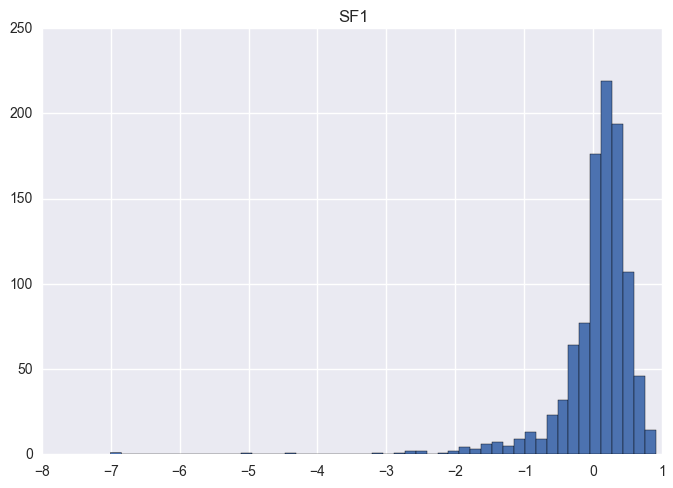

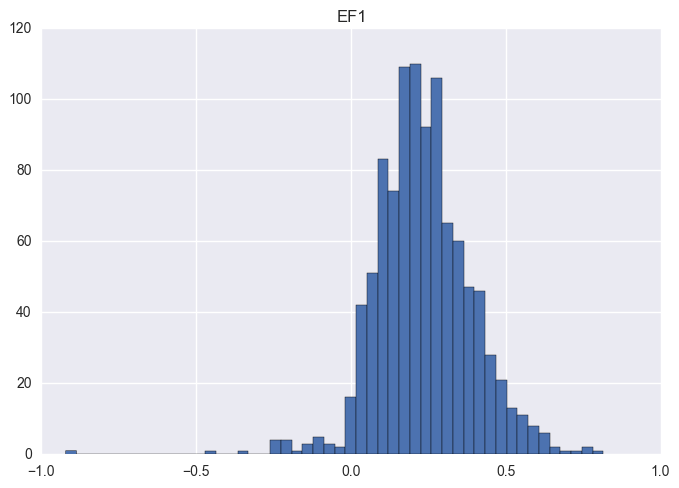

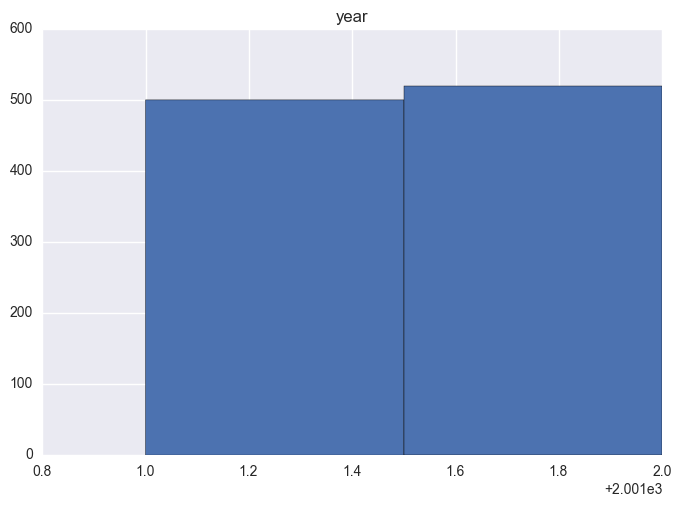

In [9]:
data.hist(column='SF1', bins=50)
data.hist(column='EF1', bins=50)
data.hist(column="year", bins=2)

In [9]:
print(np.sum(data["Bankrupt"][data['year']==2002] == 1))
print(np.sum(data["Bankrupt"][data['year']==2003] == 1))

250
260


## Preprocessing
This is where you should think about encoding qualitative variables, dealing with missing values, etc. Try perturbating the data (add missing values, outliers, and check whether your ML pipeline can cope with it)

In [332]:
data = data.loc[np.random.permutation(data.index)]

## Recher d'outliers

On se propose de chercher des éventuels outliers dans les données. Pour cela on va computer le distance de Mahalanobis. On se base sur le principe suivnt : si $X \sim \mathbb{N} (\mu,\Sigma)$ alors $D^{2}(X,\mu) \sim \chi^{2}_{p}$.

On peut donc avoir un intervalle de confiance de tel sorte que $\mathbb{P}[D^{2}(X,\mu) \leq \chi^{2}_{p,1-\alpha}] \leq 1-\alpha$

In [333]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from sklearn.preprocessing import StandardScaler

In [334]:
X=data.drop(['Bankrupt','year'],axis=1)

In [335]:
X.describe()

,RE1,RE2,RE3,RE4,RE5,RE6,EF1,EF2,EF3,EF4,EF5,EF7,EF8,PR1,PR2,SF1,SF2,SF7,SF8,SF10,SF11,LI1,LI2,LI3,LI4,LI5,LI6,LI7,LI8,LI9,LI10,LI11,LI12,RO1,RO2,RO3,RO4,RO5,RO6,AP1,AP2
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,-1.354647,-0.281191,0.027173,0.131754,-0.017302,-0.038325,0.234672,10.923191,-0.003508,3.282544,0.257955,0.081919,0.031824,0.016365,0.212579,0.056234,0.360066,0.929037,-0.045194,0.208100,2.010596,0.138870,0.085360,0.053629,0.928491,0.282205,1.430989,0.764947,0.720937,0.489966,0.012747,-48.783808,0.194717,0.033029,0.118470,-0.002287,0.097534,0.150232,0.308369,-8443.432353,1530.108824
std,21.784422,25.055650,0.320109,6.567944,0.324393,0.343540,0.153945,252.643636,0.114674,2.879997,0.208982,0.369731,0.121255,0.056345,0.125023,0.578960,0.834323,0.561955,0.464990,0.323052,51.839935,0.170033,0.229104,0.073359,0.993626,0.853083,1.127059,0.200146,0.468753,0.248582,0.113611,1644.198704,0.489535,0.096906,0.128594,0.181594,0.104851,0.128150,0.178192,34588.743352,42691.999943
min,-429.322581,-775.464789,-5.301651,-109.913043,-5.026924,-5.099457,-0.919712,-1146.270247,-1.181945,0.610053,-1.441723,-8.026332,-1.887174,0.000000,0.000000,-7.005455,-1.299585,0.090541,-5.230267,-0.000046,-92.021201,0.000000,-0.873801,0.000000,0.024501,-0.957084,0.083597,0.068299,0.046203,0.011450,-1.246539,-52466.000000,-0.749076,-0.669310,0.000000,-2.269200,-0.006138,0.000783,0.016186,-385480.000000,-333672.000000
25%,-0.358043,0.046464,-0.039508,0.003478,-0.073862,-0.102340,0.138783,-3.200222,-0.028010,1.966624,0.126184,-0.033226,-0.010129,0.001808,0.124712,-0.060557,-0.057212,0.639633,-0.186734,0.034976,-0.029943,0.011185,-0.033097,0.004166,0.403830,-0.039993,0.869181,0.640807,0.428802,0.287975,-0.011995,-0.676318,-0.029275,-0.010485,0.028643,-0.062383,0.017546,0.065384,0.177539,-6084.750000,-1733.250000
50%,0.136338,0.295179,0.072697,0.160280,0.042514,0.025113,0.225630,6.263206,0.015239,2.659740,0.250036,0.084042,0.030058,0.005413,0.195776,0.164464,0.197728,0.829461,0.019903,0.142443,0.136541,0.068874,0.057689,0.024415,0.712037,0.077006,1.198910,0.822455,0.622674,0.482107,0.025308,0.246435,0.061604,0.018742,0.080735,0.006118,0.068803,0.116308,0.283227,0.000000,0.000000
75%,0.481146,0.721666,0.158054,0.364184,0.121902,0.107368,0.325520,15.697536,0.044848,3.843679,0.377616,0.206654,0.074758,0.013081,0.276408,0.353806,0.550876,1.041510,0.201277,0.285043,0.729516,0.209680,0.205059,0.071403,1.170697,0.402115,1.690784,0.930135,0.875526,0.675069,0.061574,2.288452,0.291027,0.069809,0.167917,0.074052,0.143278,0.196731,0.393850,0.000000,3482.250000
max,118.839813,74.632371,1.327650,80.595364,0.856992,0.853046,0.814804,7464.760563,0.408182,53.851933,0.999339,2.691737,0.980102,0.831367,0.795916,0.909458,10.044759,7.883553,0.908616,6.929760,1626.957746,0.926290,0.926290,0.481380,21.198700,19.052855,21.198700,1.000002,5.651957,1.000002,0.415143,1813.478261,6.131070,0.481380,1.017048,0.977890,0.834560,1.378212,1.458458,320727.000000,367892.000000


On va normaliser les données pour utiliser la distance

In [336]:
stdScaler=StandardScaler()
stdScaler.fit(X)
Xnorm=pd.DataFrame(stdScaler.transform(X),columns=X.columns)

In [337]:
Xnorm.head()

,RE1,RE2,RE3,RE4,RE5,RE6,EF1,EF2,EF3,EF4,EF5,EF7,EF8,PR1,PR2,SF1,SF2,SF7,SF8,SF10,SF11,LI1,LI2,LI3,LI4,LI5,LI6,LI7,LI8,LI9,LI10,LI11,LI12,RO1,RO2,RO3,RO4,RO5,RO6,AP1,AP2
0,0.126040,0.011029,0.137694,-0.012522,0.142479,0.109529,0.323552,0.021122,0.138538,-0.328923,-0.566095,0.064717,0.111293,-0.065470,0.145079,0.151106,-0.229797,-0.135369,0.071183,0.278801,0.001242,-0.723242,-0.931408,-0.638249,-0.535367,-0.601351,-0.606619,-1.750096,-0.354426,-1.085851,0.156302,0.042692,-0.704456,-0.906456,-0.273280,-0.015969,-0.266505,-0.495252,-0.734174,0.244229,0.309153
1,0.069756,0.017875,0.281242,-0.003162,0.337524,0.352599,0.231469,-0.028774,0.472766,-0.508772,-0.200134,0.529031,0.996519,-0.174081,-0.128563,0.761833,0.753500,-0.758664,1.426007,0.092918,-0.029559,-0.195297,0.088733,0.061371,1.649760,0.137067,2.041854,1.115198,-0.973545,0.763825,0.455251,0.031189,0.031510,0.259147,0.397643,1.884122,1.675962,-0.755595,1.320052,-0.363174,0.492697
2,0.067015,0.015608,0.050840,-0.011542,0.146672,0.178008,0.052710,-0.009871,0.181234,-0.531564,0.113315,-0.189091,-0.205888,-0.180902,0.008039,0.262027,-0.117109,-0.243736,0.807749,0.743003,0.002793,-0.747482,-0.321080,-0.639299,-0.282806,-0.290633,0.499708,-0.393867,-0.804255,-1.075028,0.106046,0.037993,-0.367418,-0.271270,1.135189,1.050792,0.158351,-0.124371,0.467053,0.077590,-0.035858
3,0.064888,0.013824,-0.000414,-0.015028,0.066468,0.131922,-0.513262,0.093171,0.040642,0.143178,-1.289536,-0.320968,-0.344529,-0.289177,-0.591070,0.088153,-0.287724,-0.064596,0.777805,1.235936,0.070462,1.070063,1.027841,0.452493,0.588544,0.986168,1.597557,0.788105,-0.929213,-0.232974,-0.047800,0.042454,0.336278,0.555232,0.111219,0.484262,-0.734451,-0.881556,-0.329347,0.099602,-0.004807
4,0.071348,0.018977,0.156370,-0.001138,0.178105,0.182661,-0.138554,0.018708,0.210005,-0.457011,0.232910,0.135051,0.290405,-0.145588,-0.117684,0.120060,-0.259357,-0.097468,0.459487,0.551677,0.020493,-0.580652,-0.197265,-0.452765,-0.328995,-0.234398,-0.003278,-0.341636,-0.497048,-0.789965,0.233393,0.033593,-0.304009,-0.130061,0.671955,0.484163,-0.734680,-0.158240,0.257019,0.244229,-0.029343


In [403]:
Xnorm.describe()

,RE1,RE2,RE3,RE4,RE5,RE6,EF1,EF2,EF3,EF4,EF5,EF7,EF8,PR1,PR2,SF1,SF2,SF7,SF8,SF10,SF11,LI1,LI2,LI3,LI4,LI5,LI6,LI7,LI8,LI9,LI10,LI11,LI12,RO1,RO2,RO3,RO4,RO5,RO6,AP1,AP2
count,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03
mean,-1.172809e-17,1.262607e-17,-2.530655e-17,1.540332e-17,-5.986497e-19,1.355125e-17,4.005511e-17,-9.877720e-18,-2.051736e-17,7.140258e-17,-1.638940e-16,-4.702121e-17,8.625998e-18,1.142877e-18,-6.313033e-17,1.790507e-17,4.185105e-17,5.619143e-17,-3.444957e-17,1.169000e-16,-3.736905e-17,-1.139475e-16,-4.386469e-17,-6.889913e-17,9.028725e-17,-5.047705e-17,5.523904e-17,-7.270872e-17,6.944336e-17,-3.358969e-16,1.175530e-17,5.210973e-18,4.489660e-17,-1.159884e-17,-3.363323e-17,-1.986428e-18,7.945714e-17,-1.044916e-17,-3.689859e-16,-1.789418e-16,1.278933e-18
std,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00
min,-1.965523e+01,-3.095365e+01,-1.665508e+01,-1.676305e+01,-1.545064e+01,-1.473950e+01,-7.502342e+00,-4.582586e+00,-1.028149e+01,-9.284044e-01,-8.137112e+00,-2.194090e+01,-1.583393e+01,-2.905857e-01,-1.701149e+00,-1.220319e+01,-1.990194e+00,-1.492837e+00,-1.115642e+01,-6.446250e-01,-1.814777e+00,-8.171226e-01,-4.188623e+00,-7.314107e-01,-9.102344e-01,-1.453432e+00,-1.196080e+00,-3.482409e+00,-1.440129e+00,-1.925926e+00,-1.108966e+01,-3.189574e+01,-1.928883e+00,-7.251200e+00,-9.217241e-01,-1.248955e+01,-9.892436e-01,-1.166784e+00,-1.640517e+00,-1.090590e+01,-7.855489e+00
25%,4.577094e-02,1.308352e-02,-2.084114e-01,-1.954028e-02,-1.744417e-01,-1.864292e-01,-6.231803e-01,-5.592993e-02,-2.137737e-01,-4.571413e-01,-6.308465e-01,-3.115821e-01,-3.461591e-01,-2.584781e-01,-7.031484e-01,-2.018235e-01,-5.003849e-01,-5.152466e-01,-3.045428e-01,-5.361645e-01,-3.938163e-02,-7.513109e-01,-5.172969e-01,-6.745908e-01,-5.282853e-01,-3.778723e-01,-4.987169e-01,-6.205545e-01,-6.235243e-01,-8.129680e-01,-2.178803e-01,2.927328e-02,-4.577848e-01,-4.492522e-01,-6.988734e-01,-3.310970e-01,-7.632502e-01,-6.624310e-01,-7.345725e-01,6.822565e-02,-7.647708e-02
50%,6.847631e-02,2.301491e-02,1.422823e-01,4.345388e-03,1.844855e-01,1.847519e-01,-5.876318e-02,-1.845394e-02,1.635617e-01,-2.163578e-01,-3.790867e-02,5.743673e-03,-1.457191e-02,-1.944698e-01,-1.344617e-01,1.870301e-01,-1.946695e-01,-1.772830e-01,1.400654e-01,-2.033376e-01,-3.616855e-02,-4.118606e-01,-1.208378e-01,-3.984272e-01,-2.179494e-01,-2.406573e-01,-2.060163e-01,2.874703e-01,-2.097298e-01,-3.162709e-02,1.106148e-01,2.983477e-02,-2.720511e-01,-1.475019e-01,-2.935831e-01,4.630715e-02,-2.741526e-01,-2.648509e-01,-1.411651e-01,2.442290e-01,-3.585823e-02
75%,8.431228e-02,4.004481e-02,4.090633e-01,3.540587e-02,4.293345e-01,4.243018e-01,5.904230e-01,1.890682e-02,4.218909e-01,1.949341e-01,5.728723e-01,3.375337e-01,3.542585e-01,-5.830526e-02,5.107880e-01,5.142302e-01,2.288126e-01,2.002449e-01,5.303173e-01,2.382933e-01,-2.472435e-02,4.166510e-01,5.227225e-01,2.423964e-01,2.438789e-01,1.406293e-01,2.306198e-01,8.257428e-01,3.299491e-01,7.450015e-01,4.299904e-01,3.107734e-02,1.968334e-01,3.797368e-01,3.847158e-01,4.205896e-01,4.364

In [339]:
robust_cov = MinCovDet().fit(Xnorm)

//anaconda/lib/python3.5/site-packages/sklearn/covariance/robust_covariance.py:613: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


ValueError: Singular covariance matrix. Please check that the covariance matrix corresponding to the dataset is full rank and that MinCovDet is used with Gaussian-distributed data (or at least data drawn from a unimodal, symmetric distribution.

La matrice semble avoir des colonnes corrélées.

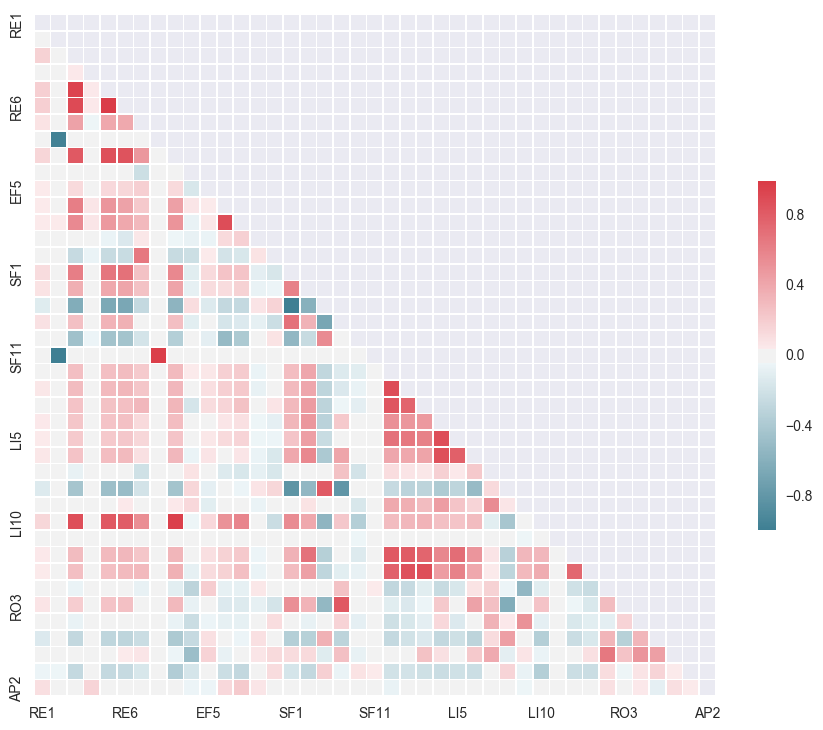

In [340]:
plt.figure(1)
plt.clf()
corr=Xnorm.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

On remarque effectivement beaucoup de corrélations entre les variables. On recherche les variables avec une forte corrélation entre elles et on va les visualiser.

In [341]:
interest=corr[np.logical_and(corr>0.7,corr!=1)]

In [342]:
values=interest.notnull().values

In [343]:
indiceOfInterests=[[]]
for i in range(values.shape[0]):
    for j in range(i,len(values[i])):
        if values[i,j]==True:
             indiceOfInterests.append([i+1,j+1])             

In [344]:
for i in range(2,len(indiceOfInterests)-1):
    Xnorm[[indiceOfInterests[i-1][0]]]
    

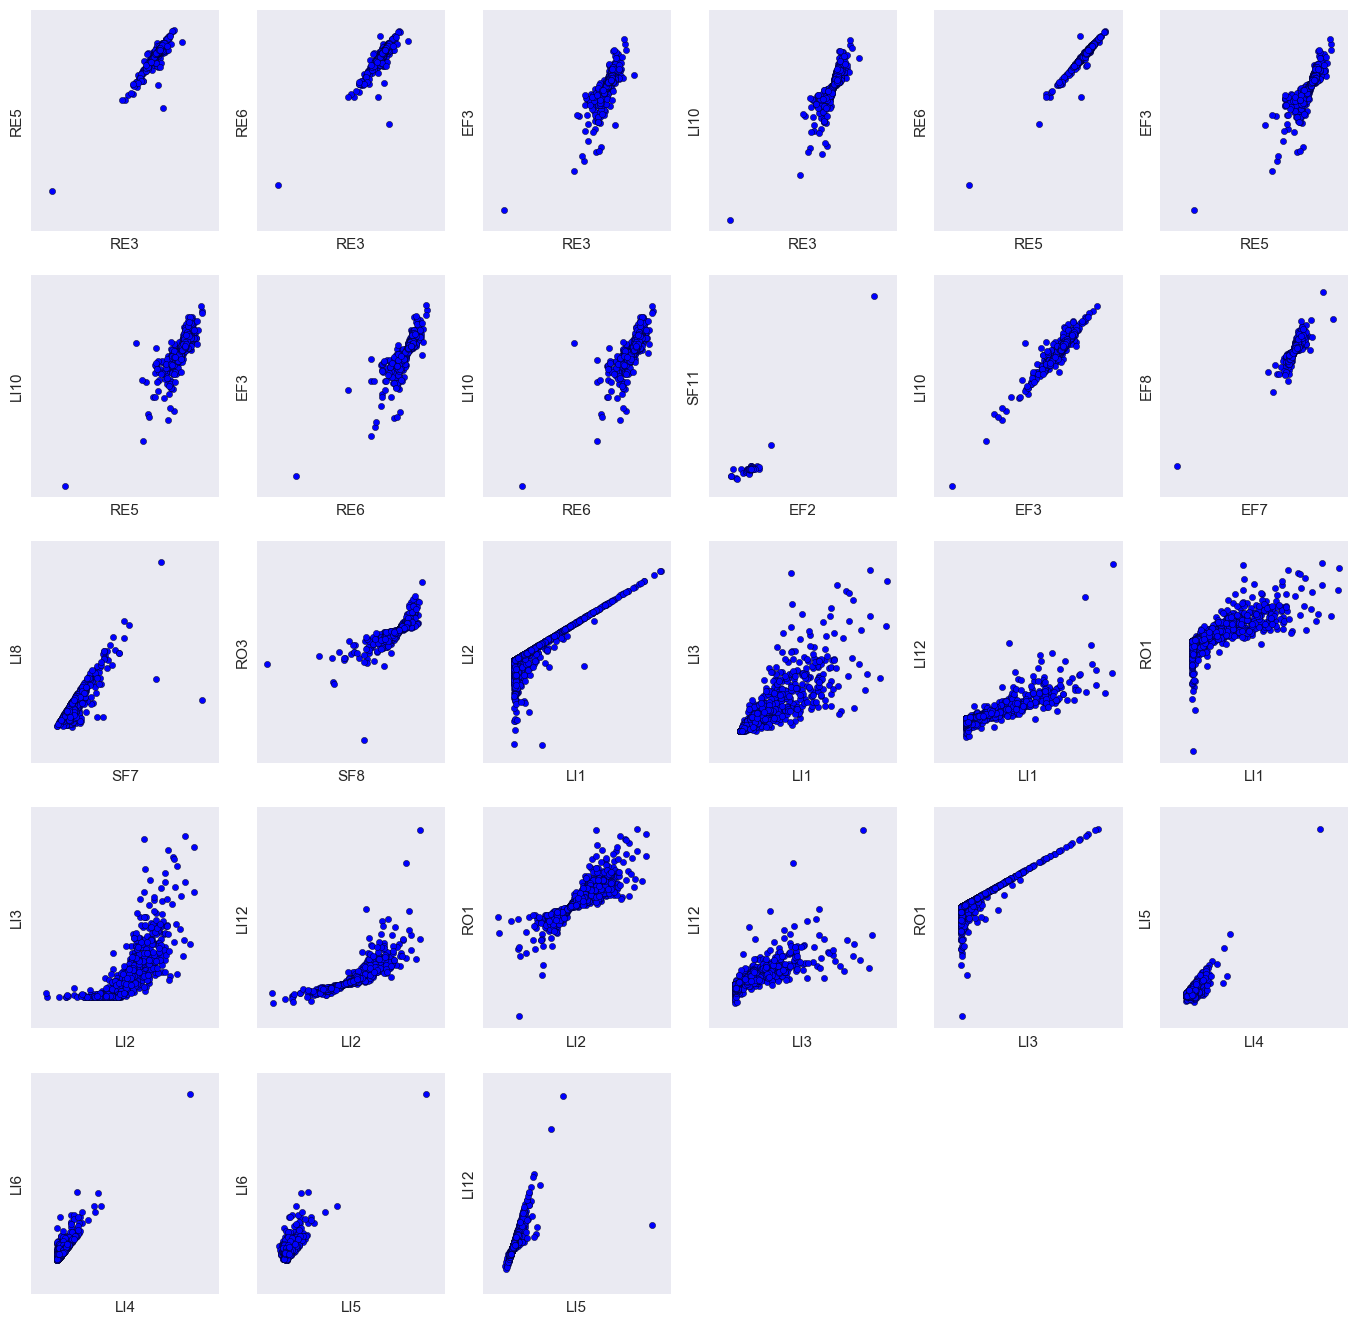

In [345]:
plt.figure(figsize=(17,20))
for i in range(1,len(indiceOfInterests)-1):
    
    plt.subplot(6,6,i)
    plt.scatter(Xnorm[[indiceOfInterests[i][0]-1]],Xnorm[[indiceOfInterests[i][1]-1]])
    plt.xlabel(list(Xnorm.columns)[indiceOfInterests[i][0]-1])
    plt.ylabel(list(Xnorm.columns)[indiceOfInterests[i][1]-1])
    frame = plt.gca()
    frame.axes.get_xaxis().set_ticks([])
    frame.axes.get_yaxis().set_ticks([])
    i=i+1
    
plt.show()

On a des variables très corrélées. On va enlever les variables suivantes pour pouvoir computer la distance voulue :
RE5, RE6, Ll10, Ll12.

In [346]:
Xnorm2=Xnorm.drop(['RE5','RE6','LI10','LI12'],axis=1)

In [347]:
robust_cov = MinCovDet().fit(Xnorm2)

//anaconda/lib/python3.5/site-packages/sklearn/covariance/robust_covariance.py:613: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


ValueError: Singular covariance matrix. Please check that the covariance matrix corresponding to the dataset is full rank and that MinCovDet is used with Gaussian-distributed data (or at least data drawn from a unimodal, symmetric distribution.

Ca ne fonctionne toujours pas .. il faudrait sûrement faire une PCA pour pouvoir faire un truc bien propre. On voit bien que dans tous les cas on va devoir transformer les variables pour faire quelque chose de propre car elles sont très corrélées.

## Outliers univariés

On va juste rechercher les outliers de manière univariée si on est à plus ou moins 5 sigma

In [348]:
univariatesOutliers=np.unique(np.where(Xnorm>5*Xnorm.std())[0])

In [349]:
len(univariatesOutliers)

54

On va regarder à quoi correspondent ces outliers par rapport à la cible

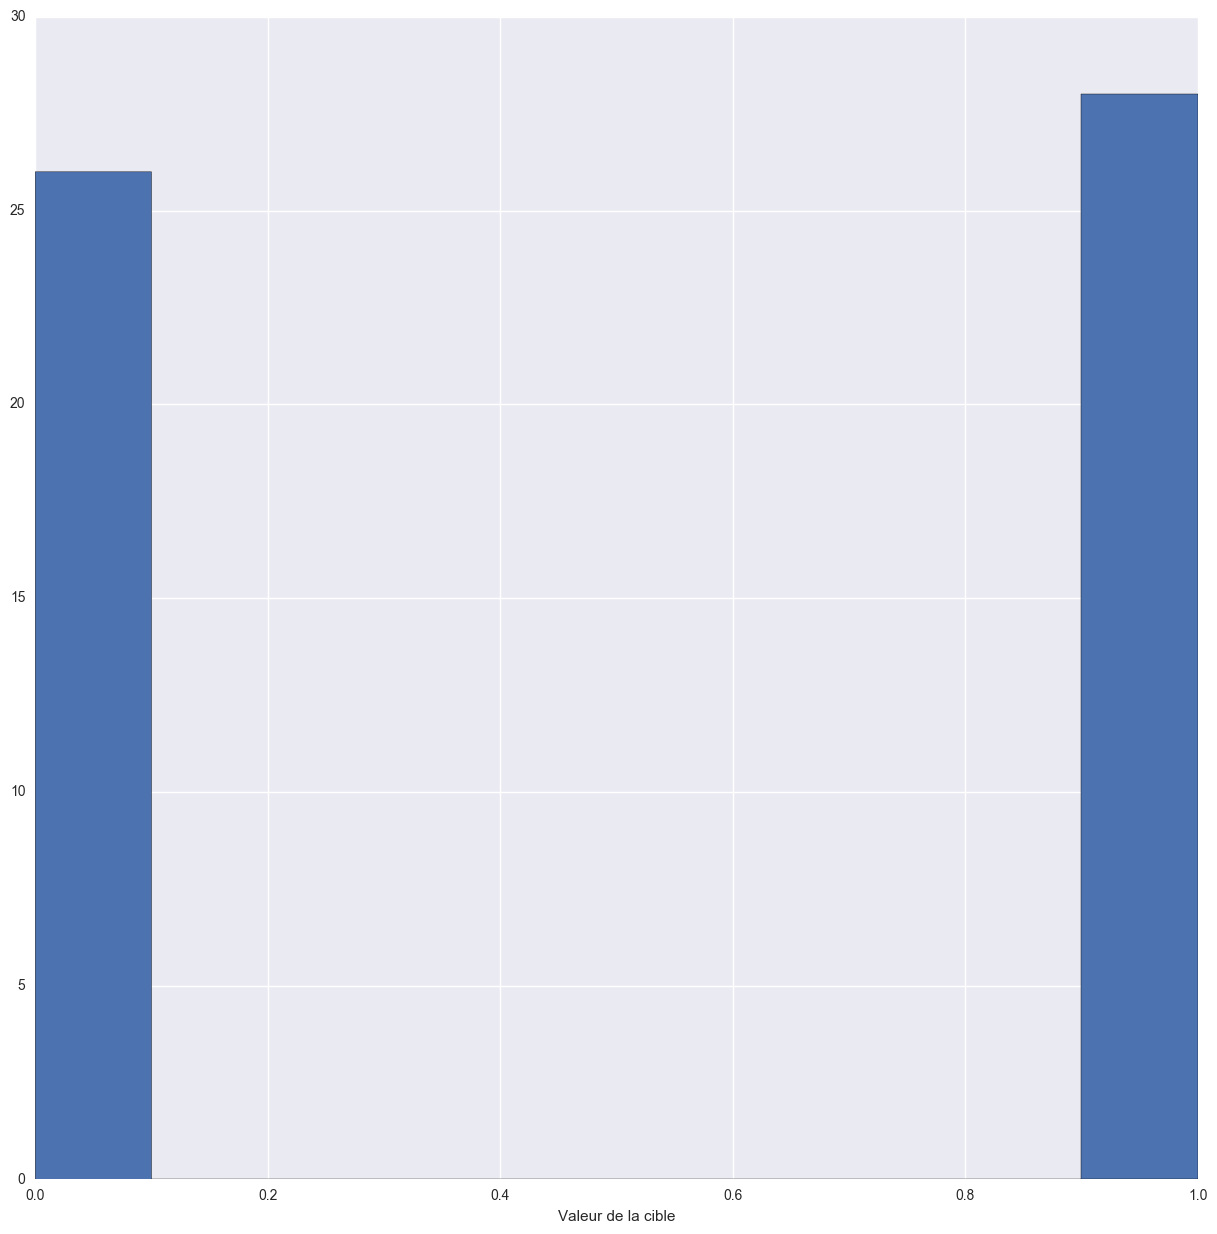

In [350]:
cible=data['Bankrupt']
plt.hist(cible[univariatesOutliers])
plt.xlabel('Valeur de la cible')
plt.show()

Il semblerait qu'on puisse enlever ces outliers car ils ne semblent pas discriminants vis à vis de la cible

In [351]:
Xnorm3=Xnorm.drop(Xnorm.index[univariatesOutliers])

In [352]:
cible3=cible.drop(univariatesOutliers)

In [353]:
len(cible3)

966

## ISOMAP

A présent on va effectuer une ISOMAP pour décorréler les variables.

In [354]:
from sklearn.manifold import Isomap

In [355]:
iso=Isomap(n_neighbors=8)

In [356]:
isoTransfo=iso.fit_transform(Xnorm3)

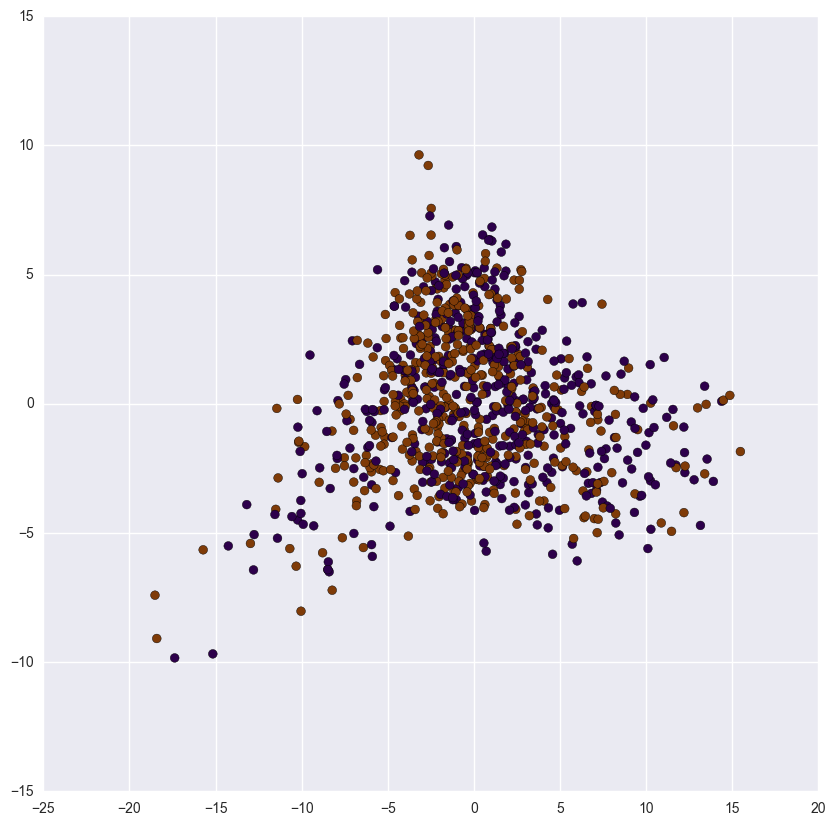

In [357]:
plt.rcParams['figure.figsize'] = 10, 10
fig, ax = plt.subplots()
scatter = ax.scatter(isoTransfo[:,0],
                     isoTransfo[:,1],
                     c=cible3,
                     cmap=plt.cm.PuOr,
                     s=40)


On va essayer de trouver le nombre de voisins qui sépare le mieux

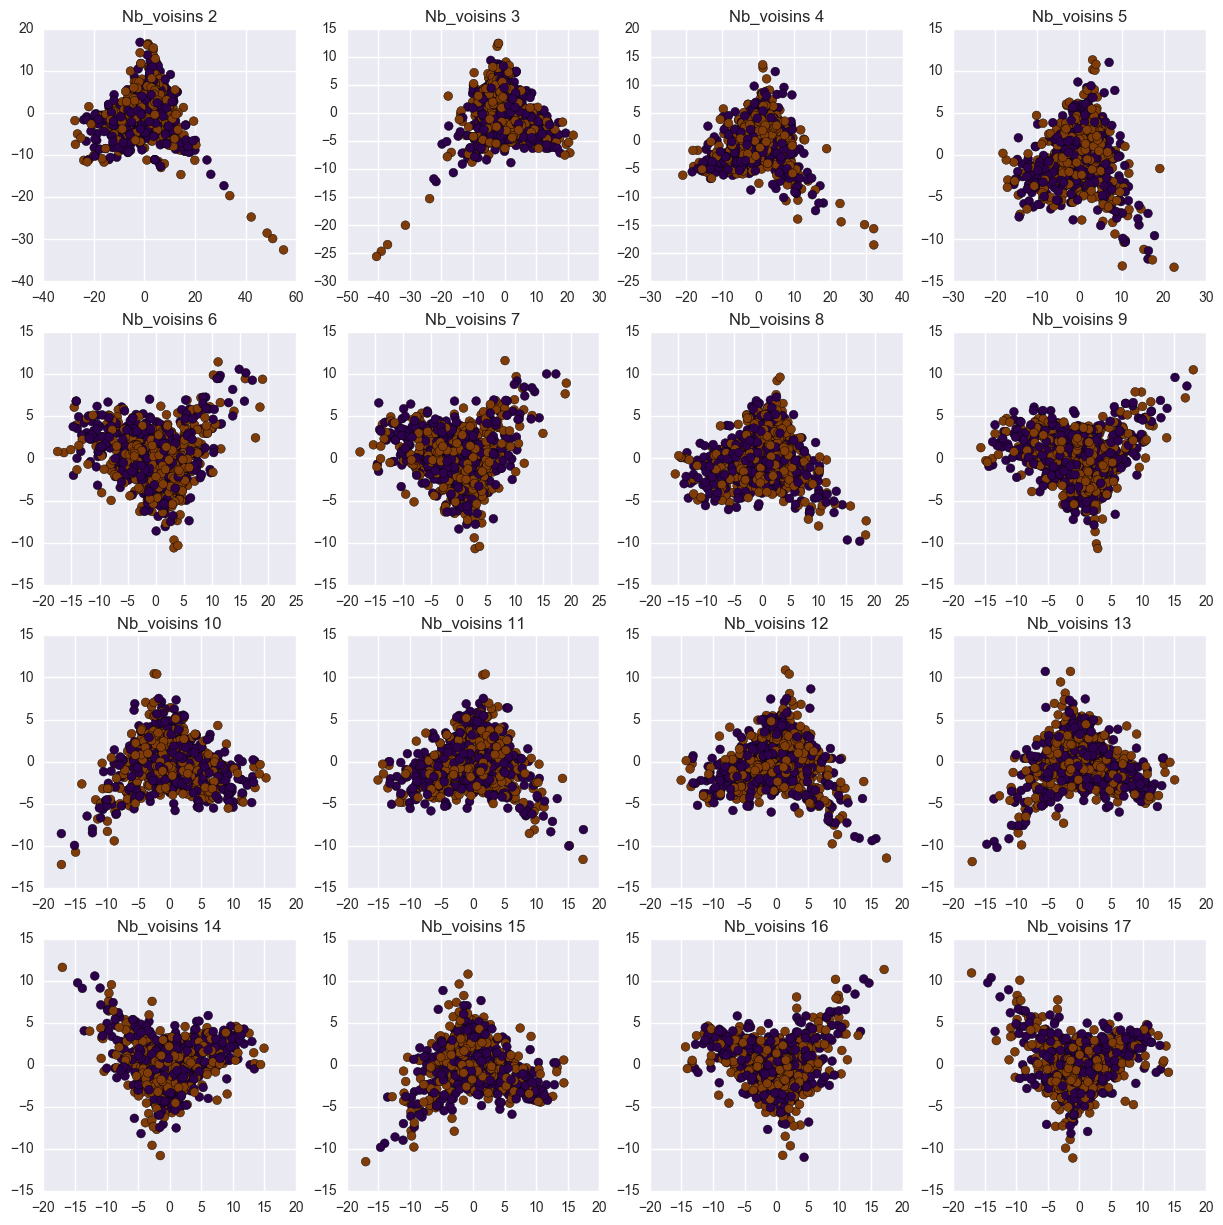

In [358]:
plt.rcParams['figure.figsize'] = 15, 15
fig, ax = plt.subplots(4,4)
k=0
l=0
for nb_neigh in range(2,18):

    numLigne=l
    numColonne=k
    iso=Isomap(n_neighbors=nb_neigh)
    isoTransfo=iso.fit_transform(Xnorm3)
    ax[numLigne,numColonne].scatter(isoTransfo[:,0],
                isoTransfo[:,1],
                c=cible3,
                cmap=plt.cm.PuOr,
                s=40)
    ax[numLigne,numColonne].set_title('Nb_voisins '+str(nb_neigh))
    if k==3:
        k=0
        l=l+1
    else:
        k=k+1
   
plt.show()



Bon c'est joli mais ça ne sépare pas vraiment bien.. On va faire avec plus de composantes et faire un modèle dessus.

# Random Forest

In [407]:
from sklearn.ensemble import RandomForestClassifier

In [408]:
iso=Isomap(n_neighbors=10,n_components=5)
X_transfo=iso.fit_transform(Xnorm)

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X_transfo, cible, test_size=0.33, random_state=42)

In [410]:
rf=RandomForestClassifier(n_estimators=10,max_depth=10)

In [411]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [412]:
rf.score(X_test,y_test)

0.85163204747774479

In [413]:
score=np.zeros((15,15))
for neight in range(15):
    for component in range(15):        
        iso=Isomap(n_neighbors=10,n_components=5)
        X_transfo=iso.fit_transform(Xnorm)
        X_train, X_test, y_train, y_test = train_test_split(X_transfo, cible, test_size=0.33, random_state=42)
        rf=RandomForestClassifier(n_estimators=60,max_depth=10)
        rf.fit(X_train,y_train)
        score[neight,component]=rf.score(X_test,y_test)
        print(neight,component)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
14 0
14 1
14 2
14 3
14 4
14 5


In [419]:
max(np.reshape(score,(15*15,1)))

array([ 0.88724036])

Abandon de l'idée : les données sont trop mélangées même en prenant plus de composantes. (edit : le problème venait des outliers en les enlevant ça passe même si le score est pas foufou)

In [405]:
score=np.zeros((15,15))
for estimator in range(5,60):
    for depth in range(1,15):        
        X_train, X_test, y_train, y_test = train_test_split(Xnorm, cible, test_size=0.33, random_state=42)
        rf=RandomForestClassifier(n_estimators=estimator,max_depth=depth)
        rf.fit(X_train,y_train)
        score[estimator,depth]=rf.score(X_test,y_test)
        print(estimator,depth)

5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14


IndexError: index 15 is out of bounds for axis 0 with size 15

In [406]:
score

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 

C'est de la faute des outliers !!!!! Il ne faut pas enlever les univariates.

## $F_{\beta}$

In [1]:
from sklearn.metrics import fbeta_score

In [ ]:
fbeta=fbeta_score()

In [11]:
data_encoded = data # In this first example, I won't do anything since all variables are numeric, and I'll apply RFs

## Feature extraction
This is where you perform preliminary variable selection, dimensionality reduction, etc. In this starting kit, I'll do nothing and will apply a vanilla random forest classifier. You should implement other classifiers and choose appropriate preprocessing methods. By the way, how do you validate your choices of preprocessing and/or classifiers? You can check out scikit-learn's "pipeline" class.

## Classification: A random forest baseline

We isolate the target column.

In [399]:
features = data_encoded.drop(['Bankrupt'], axis=1)
X_columns = data_encoded.columns.drop(['Bankrupt'])
X = features.values
y = data_encoded['Bankrupt'].values

Scikit-Learn has great wrappers for train-test splitting or cross-validation.

In [400]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

0.883621146709 0.0212878027194
CPU times: user 278 ms, sys: 42.1 ms, total: 320 ms
Wall time: 510 ms


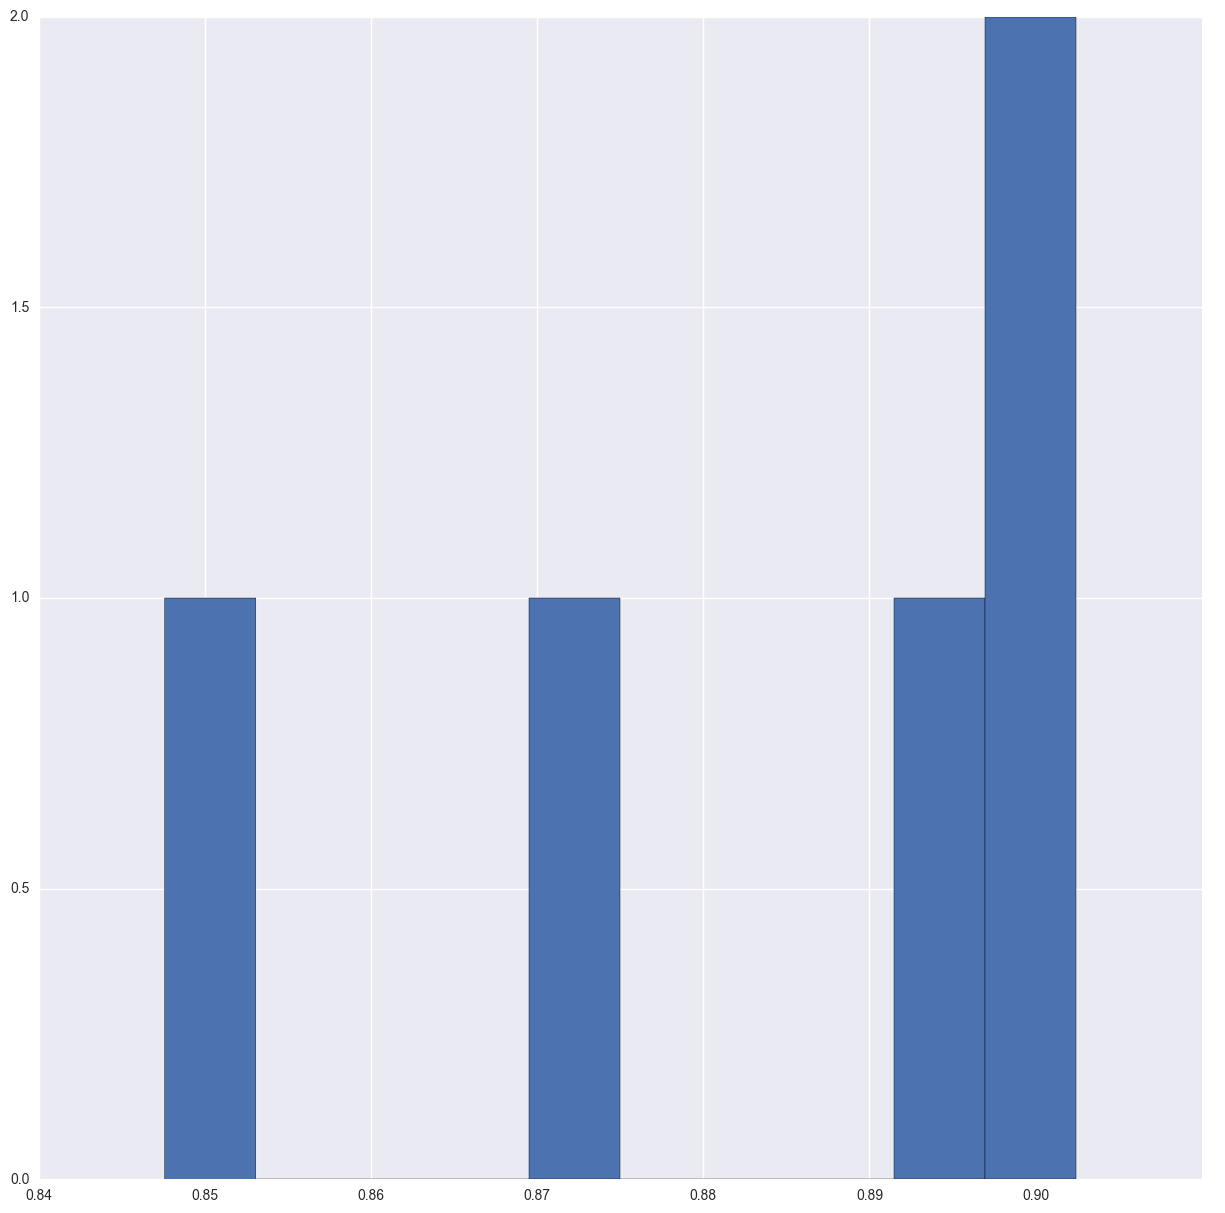

In [402]:
%%time
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

n_estimators = 10
max_depth = 50
max_features = 10
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy',n_jobs=3)
plt.hist(scores)
print(np.mean(scores), np.std(scores))

Now pause and ask yourself this important question: How would you characterize the uncertainty in the cross-validation error? How would you characterize the uncertainty on the test error? Don't hesitate to google, this is one of the most underrated ML topic.

## Variable importances

Let us look at the "importance" of each feature in the RF. Try this several times, what do you observe? Is it consistent with other methods than RF?

In [15]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [16]:
len(X_columns)

42

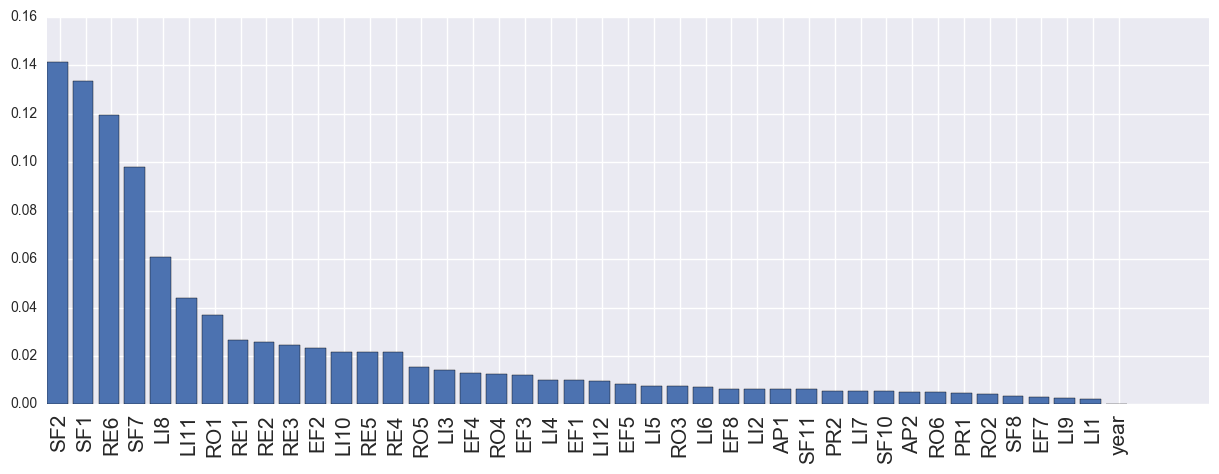

In [17]:
plt.figure(figsize=(15, 5))

ordering = np.argsort(clf.feature_importances_)[::-1][:50]

importances = clf.feature_importances_[ordering]
feature_names = X_columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);